In [269]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [270]:
df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [271]:
df['salary_year_avg'].sample(20)

362296   NaN
444278   NaN
403076   NaN
145312   NaN
478793   NaN
199255   NaN
165123   NaN
579161   NaN
652936   NaN
274821   NaN
675575   NaN
8505     NaN
404751   NaN
430103   NaN
91247    NaN
762893   NaN
40561    NaN
502583   NaN
570059   NaN
6541     NaN
Name: salary_year_avg, dtype: float64

In [272]:
#Getting median value to fill NAN
salary_year_median = df['salary_year_avg'].median()
print(salary_year_median)

115000.0


In [273]:
salary_hour_median = df['salary_hour_avg'].median()
print(salary_hour_median)

45.97999954223633


In [274]:
df['salary_year_avg'].fillna(salary_year_median, inplace=True) #empty column is filled with median value

C:\Users\rasak\AppData\Local\Temp\ipykernel_25112\3010855884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary_year_avg'].fillna(salary_year_median, inplace=True) #empty column is filled with median value


In [275]:
#Next time create a copy of the original dataframe.
df_filled = df

In [276]:
df['salary_hour_avg'].fillna(salary_hour_median, inplace=True) #Empty column is filled with median value

C:\Users\rasak\AppData\Local\Temp\ipykernel_25112\1785574961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary_hour_avg'].fillna(salary_hour_median, inplace=True) #Empty column is filled with median value


In [277]:
#removing duplicates from the dataset
df_unique = df
df_unique = df_unique.drop_duplicates()
print('length of the original dataframe df:',      len(df))
print('length of the new dataframe df:',          len(df_unique))
print('number of duplicated rows removed:',    len(df)-len(df_unique))

length of the original dataframe df: 785741
length of the new dataframe df: 785640
number of duplicated rows removed: 101


In [278]:
#removing companies posting repetitive jobs
df_unique = df.drop_duplicates(['job_title', 'company_name'])
print('length of the original dataframe df:',      len(df))
print('length of the new dataframe df:',          len(df_unique))
print('number of duplicated rows removed:',    len(df)-len(df_unique))

length of the original dataframe df: 785741
length of the new dataframe df: 508042
number of duplicated rows removed: 277699


In [279]:
df_unique.describe() #For overview of current dataset

,salary_year_avg,salary_hour_avg
count,508042.000000,508042.000000
mean,115154.935199,45.994324
std,7956.246989,2.669872
min,16500.000000,8.000000
25%,115000.000000,45.980000
50%,115000.000000,45.980000
75%,115000.000000,45.980000
max,890000.000000,237.500000


In [280]:
#To get a varied overview of the dataset
df_unique.sample(4)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
200321,Data Scientist,Data Science Manager,"London, UK",via Indeed,Full-time,False,United Kingdom,2023-11-10 15:32:40,False,False,United Kingdom,None,115000.0,45.98,Red10,['azure'],{'cloud': ['azure']}
58871,Software Engineer,"Fresher Ruby On Rails Software Engineer, Kms","Ho Chi Minh City, Vietnam",via BeBee,Full-time,False,Vietnam,2023-11-04 07:00:36,True,False,Vietnam,None,115000.0,45.98,KMS Technology,"['ruby', 'ruby', 'ruby on rails']","{'programming': ['ruby'], 'webframeworks': ['r..."
17600,Data Analyst,Logistics Data Analyst (Remote Friendly) - Rem...,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-05-30 13:00:32,False,True,United States,None,115000.0,45.98,Get It Recruit - Transportation,['sql'],{'programming': ['sql']}
455987,Data Scientist,Renewable Energy Data Scientist,"Sofia, Bulgaria",via LinkedIn,Full-time,False,Bulgaria,2023-02-17 14:52:15,True,False,Bulgaria,None,115000.0,45.98,TokWise,['python'],{'programming': ['python']}


In [281]:
#The value in the original df has been altered. We ought to have created a copy initially. Hence, the need for reinitiation.
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [282]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [283]:
job_countries = df['job_country'].value_counts().head(6).index
print(job_countries)

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')


In [284]:
salary_avg_by_job_title = df.pivot_table(values='salary_year_avg', 
                                                index='job_country', 
                                                columns='job_title_short', 
                                                aggfunc='median')

In [285]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

In [286]:
salary_avg_by_job_title = salary_avg_by_job_title.loc[job_countries]

In [287]:
print(salary_avg_by_job_title)

job_title_short  Business Analyst  Cloud Engineer  Data Analyst  \
job_country                                                       
United States             90000.0        116100.0       90000.0   
India                     64800.0             NaN      100500.0   
United Kingdom            56700.0             NaN       87750.0   
France                    89100.0        105968.0       69175.0   
Germany                   89100.0         89100.0      103750.0   
Spain                     86400.0         89100.0       91977.0   

job_title_short  Data Engineer  Data Scientist  Machine Learning Engineer  \
job_country                                                                 
United States         125000.0        130000.0                   150000.0   
India                 147500.0        114008.0                    79200.0   
United Kingdom        110000.0        105300.0                   149653.0   
France                 98301.5         88128.0                    80850.0   
G

In [288]:
salary_avg_by_job_title = salary_avg_by_job_title[job_titles]

In [289]:
print(salary_avg_by_job_title)

job_title_short  Data Analyst  Data Engineer  Data Scientist
job_country                                                 
United States         90000.0       125000.0        130000.0
India                100500.0       147500.0        114008.0
United Kingdom        87750.0       110000.0        105300.0
France                69175.0        98301.5         88128.0
Germany              103750.0       147500.0        131560.0
Spain                 91977.0       133000.0         88128.0


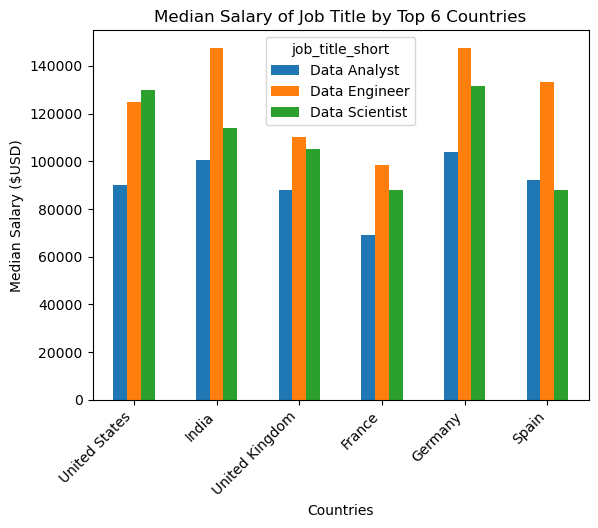

In [290]:
salary_avg_by_job_title.plot(kind='bar')
plt.title('Median Salary of Job Title by Top 6 Countries')
plt.xlabel('Countries')
plt.ylabel('Median Salary ($USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [291]:
df_US = df[df['job_country'] == 'United States'].copy() #Creating a copy from existing dataframe and it prevents altering original dataset

In [292]:
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206292 entries, 0 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        206292 non-null  object 
 1   job_title              206292 non-null  object 
 2   job_location           205505 non-null  object 
 3   job_via                206285 non-null  object 
 4   job_schedule_type      205099 non-null  object 
 5   job_work_from_home     206292 non-null  bool   
 6   search_location        206292 non-null  object 
 7   job_posted_date        206292 non-null  object 
 8   job_no_degree_mention  206292 non-null  bool   
 9   job_health_insurance   206292 non-null  bool   
 10  job_country            206292 non-null  object 
 11  salary_rate            25372 non-null   object 
 12  salary_year_avg        15766 non-null   float64
 13  salary_hour_avg        9405 non-null    float64
 14  company_name           206292 non-null  o

In [293]:
print(df[df['job_posted_date'].isna()])

Empty DataFrame
Columns: [job_title_short, job_title, job_location, job_via, job_schedule_type, job_work_from_home, search_location, job_posted_date, job_no_degree_mention, job_health_insurance, job_country, salary_rate, salary_year_avg, salary_hour_avg, company_name, job_skills, job_type_skills]
Index: []


In [294]:
invalid_dates = df[df['job_posted_date'].isna()]
print(invalid_dates)

Empty DataFrame
Columns: [job_title_short, job_title, job_location, job_via, job_schedule_type, job_work_from_home, search_location, job_posted_date, job_no_degree_mention, job_health_insurance, job_country, salary_rate, salary_year_avg, salary_hour_avg, company_name, job_skills, job_type_skills]
Index: []


In [295]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
print(df['job_posted_date'])

0        2023-06-16 13:44:15
1        2023-01-14 13:18:07
2        2023-10-10 13:14:55
3        2023-07-04 13:01:41
4        2023-08-07 14:29:36
                 ...        
785736   2023-03-13 06:16:16
785737   2023-03-12 06:18:18
785738   2023-03-12 06:32:36
785739   2023-03-12 06:32:15
785740   2023-03-13 06:16:31
Name: job_posted_date, Length: 785741, dtype: datetime64[ns]


In [ ]:
df_US['job_posted_date'] = pd.to_datetime(df_US['job_posted_date'])
#df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
print(df_US['job_posted_month']) #Now an object and it is in our df_US dataframe

0             June
3             July
5         November
6            March
9            April
            ...   
785673     October
785685        July
785692       April
785703     January
785705     January
Name: job_posted_month, Length: 206292, dtype: object


In [ ]:
df_US_pivot = df_US.pivot_table(index='job_posted_month' , columns='job_title_short', aggfunc='size')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [ ]:
#df_US_pivot.reset_index() this is to get new index values
# Define a mapping from month names to month numbers
month_mapping = {'January': 1, 'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12}
df_US_pivot['month_no'] = df_US_pivot.index.map(month_mapping)
df_US_pivot.sort_values('month_no', inplace=True)

In [ ]:
df_US_pivot.head(3)

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
job_posted_month,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,1
February,447,24,6124,3060,4956,56,1258,878,1127,90,2
March,438,19,6218,3183,4779,59,1114,829,1150,115,3


<Axes: xlabel='job_posted_month'>

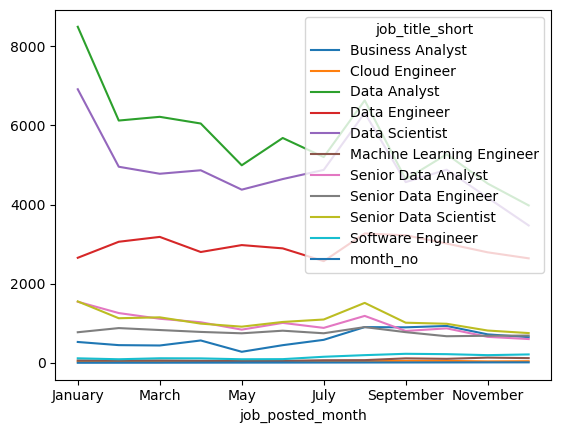

In [ ]:
df_US_pivot.plot(kind='line')

In [ ]:
top_three = df_US['job_title_short'].value_counts().head(3)
top_three = top_three.index.to_list()

Text(0.5, 1.0, 'Top Three Most Posted Jobs in the US by Months')

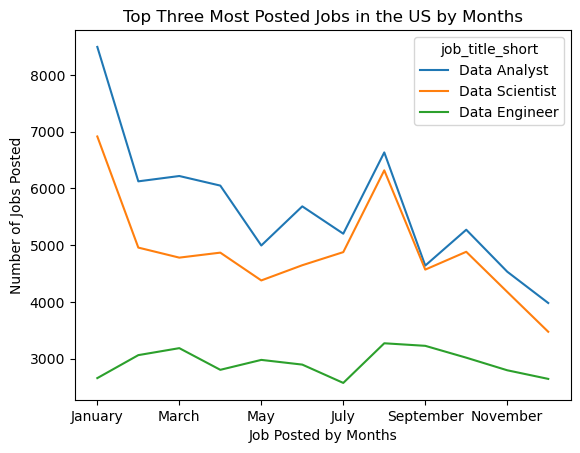

In [ ]:
df_US_pivot[top_three].plot(kind='line')
plt.xlabel('Job Posted by Months')
plt.ylabel('Number of Jobs Posted')
plt.title('Top Three Most Posted Jobs in the US by Months')

In [ ]:
df_jobs = pd.read_csv('https://lukeb.co/software_csv', index_col = 'job_posted_month')
df_jobs.head()

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980


In [ ]:
df_merge = df_US_pivot.merge(df_jobs, on='job_posted_month') #It merges new dataframe to existing one 'on' where stated.
df_merge.head(3)

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,1,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,2,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,3,11102,8178,5814,4159


In [ ]:
df_merge.head(3)

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159


In [ ]:
top_five = (df_merge.sum() #To calculate the each of the values in the column
            .sort_values(ascending=False) #To arrange in descending order
            .head() #It returns the top five
            .index #Changes the values and brings out its unique index
            .to_list()) #Convert it into a list 
top_five

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

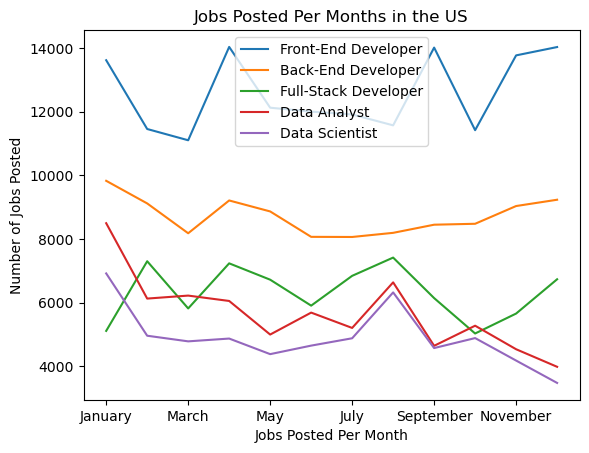

In [ ]:
df_merge[top_five].plot(kind='line') #To plot the graph for top five jobs posted per month
plt.xlabel("Jobs Posted Per Month")
plt.ylabel("Number of Jobs Posted")
plt.title('Jobs Posted Per Months in the US')
plt.legend()
plt.show()

In [ ]:
df_US_pivot.head()

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
job_posted_month,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,1
February,447,24,6124,3060,4956,56,1258,878,1127,90,2
March,438,19,6218,3183,4779,59,1114,829,1150,115,3
April,565,40,6049,2801,4867,51,1025,781,991,112,4
May,279,20,4993,2976,4377,49,839,746,914,90,5


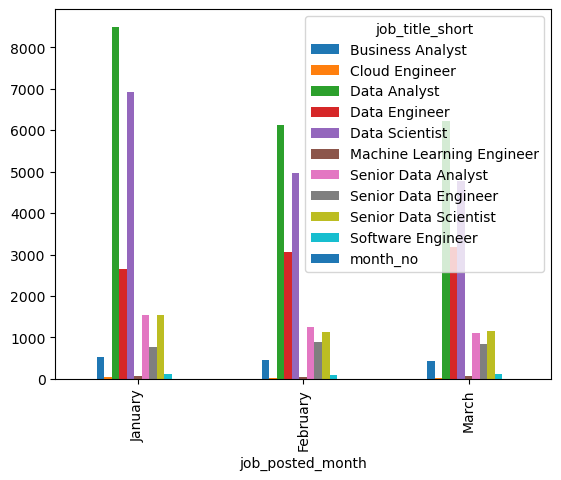

In [ ]:
quarter_one = df_US_pivot[df_US_pivot.index.isin(['January', 'February', 'March'])].plot(kind='bar')

In [ ]:
top_three_jobs_Q1 = df_US_pivot.sum().sort_values(ascending=False).head(3).index.to_list() #This extract the top three most posted jobs by months

top_three_jobs_Q1

['Data Analyst', 'Data Scientist', 'Data Engineer']

<Axes: xlabel='job_posted_month'>

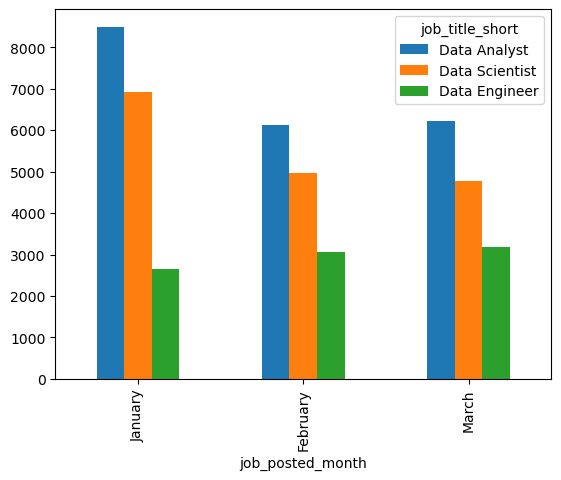

In [ ]:
df_US_pivot[top_three_jobs_Q1].loc[df_US_pivot.index.isin(['January', 'February', 'March'])].plot(kind="bar") #.loc filtered the job_posted_month to get the first quarter plotted along job_title_short


In [ ]:
df_US_pivot.to_csv('folder.csv')

In [ ]:
df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_increase
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,[],None,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",NaN


In [ ]:
df['inflated_salary'] = df.loc[pd.notna(df['salary_year_avg']), 'salary_year_avg'] * 1.03 #It filters away null from the column, created a new salary with projected 3% increase

In [ ]:
df[df['inflated_salary'].notna()]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,inflated_salary
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",112785.00
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",144200.00
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",123600.00
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",235068.66
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",91670.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",143392.48
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,154500.00
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",228531.25
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",162225.00


In [ ]:
df['salary_increase'] = df['salary_year_avg'].apply(lambda x: x * 1.03) #This achieves same result and gives us projected increase rate

In [ ]:
df[df['salary_increase'].notna()]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_increase,inflated_salary
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",112785.00,112785.00
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",144200.00,144200.00
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",123600.00,123600.00
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",235068.66,235068.66
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",91670.00,91670.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",143392.48,143392.48
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",[],None,154500.00,154500.00
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",228531.25,228531.25
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",162225.00,162225.00


In [ ]:
#f_exploded = df.dropna(subset=['job_skills'])
df['job_skills'] = df['job_skills'].apply(lambda x: [i for i in x if pd.notna(i)] if isinstance(x, list) else x) #nan cleansed

In [ ]:
df_exploded = df.dropna(subset=['job_skills'])

In [ ]:
df_exploded = df_exploded[df_exploded['job_skills'].apply(lambda x: x != [])] #empty list cleansed
df_exploded.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_increase,inflated_salary
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",NaN,NaN
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",NaN,NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",NaN,NaN


In [ ]:
df_exploded['job_skills'] = df_exploded['job_skills'].apply(lambda x: [x] if isinstance(x, str) else x)

In [ ]:
print(df_exploded['job_skills'].apply(type).head()) #fully in list

1    <class 'list'>
2    <class 'list'>
3    <class 'list'>
4    <class 'list'>
5    <class 'list'>
Name: job_skills, dtype: object


In [ ]:
df_exploded.applymap(type).iloc[0] #To get the exact data type and not generic 'object'


C:\Users\rasak\AppData\Local\Temp\ipykernel_25112\1539306326.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_exploded.applymap(type).iloc[0] #To get the exact data type and not generic 'object'


job_title_short                                              <class 'str'>
job_title                                                    <class 'str'>
job_location                                                 <class 'str'>
job_via                                                      <class 'str'>
job_schedule_type                                            <class 'str'>
job_work_from_home                                          <class 'bool'>
search_location                                              <class 'str'>
job_posted_date          <class 'pandas._libs.tslibs.timestamps.Timesta...
job_no_degree_mention                                       <class 'bool'>
job_health_insurance                                        <class 'bool'>
job_country                                                  <class 'str'>
salary_rate                                             <class 'NoneType'>
salary_year_avg                                            <class 'float'>
salary_hour_avg          

In [ ]:
# Use .explode() to directly split the lists into separate rows
df_exploded = df['job_skills'].explode().reset_index(drop=True)

# Inspect the result by viewing the first few rows
print(df_exploded.head())


0                                                  NaN
1    ['r', 'python', 'sql', 'nosql', 'power bi', 't...
2    ['python', 'sql', 'c#', 'azure', 'airflow', 'd...
3    ['python', 'c++', 'java', 'matlab', 'aws', 'te...
4    ['bash', 'python', 'oracle', 'aws', 'ansible',...
Name: job_skills, dtype: object


In [ ]:
type(skills_count)

pandas.core.series.Series

In [ ]:
df_skills_count = skills_count.reset_index(name='skill_count') #Resetting index & giving it label title
df_skills_count

,job_skills,job_title_short,skill_count
0,"['airflow', 'confluence']",Data Engineer,1
1,"['airflow', 'datarobot', 'docker', 'kubernetes']",Senior Data Engineer,1
2,"['airflow', 'docker', 'gitlab', 'kubernetes']",Machine Learning Engineer,1
3,"['airflow', 'docker', 'kubernetes', 'terraform...",Data Engineer,1
4,"['airflow', 'docker', 'kubernetes']",Data Analyst,1
...,...,...,...
215215,['zoom'],Data Engineer,10
215216,['zoom'],Data Scientist,43
215217,['zoom'],Senior Data Analyst,2
215218,['zoom'],Senior Data Scientist,2


In [ ]:
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
16110,['excel'],Data Analyst,8095
208186,['sql'],Data Analyst,4997
116092,['python'],Data Scientist,4659
146457,"['sql', 'excel']",Data Analyst,3020
16108,['excel'],Business Analyst,2443
...,...,...,...
87588,"['python', 'scala', 'gcp', 'spark', 'git', 'je...",Data Engineer,1
87589,"['python', 'scala', 'gcp', 'spark', 'hadoop']",Data Scientist,1
87590,"['python', 'scala', 'gcp', 'spark', 'linux', '...",Data Scientist,1
87591,"['python', 'scala', 'gcp', 'spark', 'linux', '...",Data Scientist,1


In [ ]:

job_title = 'Data Analyst'
top_skills = 10

In [ ]:
df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final

,job_skills,job_title_short,skill_count
16110,['excel'],Data Analyst,8095
208186,['sql'],Data Analyst,4997
146457,"['sql', 'excel']",Data Analyst,3020
126028,['sap'],Data Analyst,1718
189359,"['sql', 'python']",Data Analyst,1593
49089,['power bi'],Data Analyst,1577
206258,"['sql', 'tableau']",Data Analyst,1399
24460,['go'],Data Analyst,1354
210399,['tableau'],Data Analyst,1202
160939,"['sql', 'power bi']",Data Analyst,1003


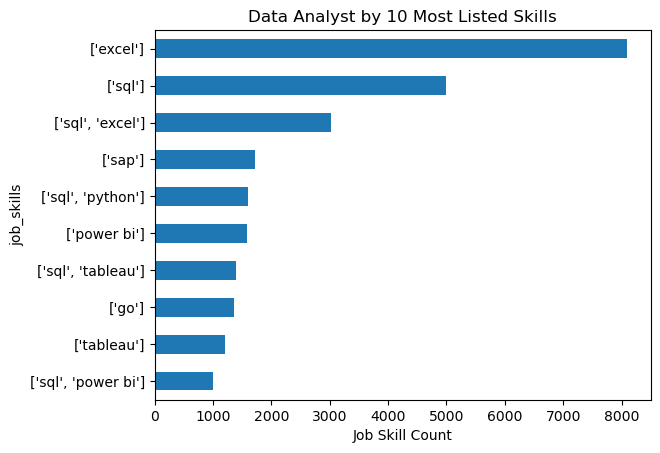

In [ ]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count', legend=False)
plt.title(f'{job_title} by {top_skills} Most Listed Skills')
plt.xlabel('Job Skill Count')
plt.gca().invert_yaxis()

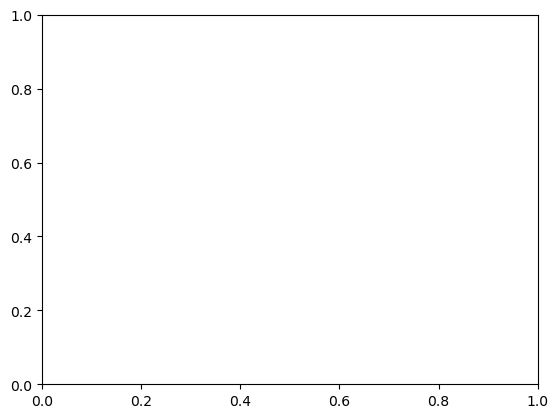

In [ ]:
#Creating Subplot in Matplotlib viz.
fig, ax = plt.subplots()
